In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [40]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_decoded_HAP1_TGFB.csv",
                              index_col=0)

In [41]:
identity_metrics.mean(1)

r_squared     0.984773
e_distance    6.306127
mmd           0.004651
dtype: float64

CellFlow

In [42]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_decoded_HAP1_TGFB.csv",
                              index_col=0)

In [43]:
cellflow_metrics.mean(1)

r_squared      0.966200
e_distance    14.150340
mmd            0.104826
dtype: float64

Mean

In [45]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_decoded_HAP1_TGFB.csv",
                              index_col=0)

In [46]:
mean_metrics.mean(1)

r_squared       0.145683
e_distance    357.481894
mmd             0.038491
dtype: float64

## Get gene list by distance from the controls 

In [47]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_HAP1_TGFB.csv",
                              index_col=0)

In [48]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [49]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [50]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [51]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*mean_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [52]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [53]:
merged.groupby("Model").mean()

,r_squared,e_distance,mmd,Perturbation effect
Model,,,,
Identity,0.984773,6.306127,0.004651,1.769231
Mean,0.145683,357.481894,0.038491,1.769231
cellFlow,0.966200,14.150340,0.104826,1.769231


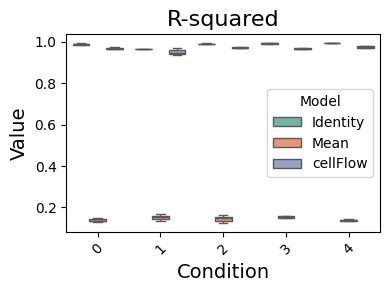

In [54]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

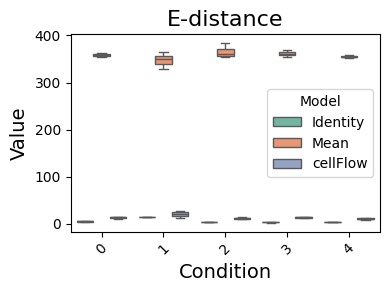

In [55]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [35]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()